# Air Deposition of Nitrogen

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from IPython.display import display
from copy import deepcopy

In [55]:
master_df: pd.DataFrame = pd.read_csv("../Raw Data/Air Deposition of Nitrogen.csv")
print(master_df)

    Domain Code                     Domain  Area Code (M49)      Area  \
0           ESB  Cropland Nutrient Balance              159     China   
1           ESB  Cropland Nutrient Balance              159     China   
2           ESB  Cropland Nutrient Balance              159     China   
3           ESB  Cropland Nutrient Balance              159     China   
4           ESB  Cropland Nutrient Balance              159     China   
..          ...                        ...              ...       ...   
243         ESB  Cropland Nutrient Balance              704  Viet Nam   
244         ESB  Cropland Nutrient Balance              704  Viet Nam   
245         ESB  Cropland Nutrient Balance              704  Viet Nam   
246         ESB  Cropland Nutrient Balance              704  Viet Nam   
247         ESB  Cropland Nutrient Balance              704  Viet Nam   

     Element Code                          Element  Item Code  \
0            7276  Cropland nitrogen per unit area       5

In [56]:
rice_yields_df: pd.DataFrame = pd.read_csv("../Cleaned Data/df_crop_yield.csv")
print(rice_yields_df)

    Year  India Rice Yield  China Rice Yield  Thailand Rice Yield  \
0   1990            2.6125            5.7261               1.9556   
1   1991            2.6271            5.6402               2.2534   
2   1992            2.6092            5.8031               2.1745   
3   1993            2.8303            5.8479               2.0497   
4   1994            2.8645            5.8311               2.3521   
5   1995            2.6972            6.0248               2.4158   
6   1996            2.8226            6.2122               2.4098   
7   1997            2.8457            6.3192               2.3788   
8   1998            2.8805            6.3662               2.4180   
9   1999            2.9782            6.3447               2.4244   
10  2000            2.8508            6.2716               2.6128   
11  2001            3.1158            6.1633               2.8739   
12  2002            2.6163            6.1890               2.9338   
13  2003            3.1177        

In [57]:
working_df = deepcopy(master_df)

In [58]:
###Keep relevant columns:
india_air_dep_df = working_df[working_df["Area"] == "India"].reset_index(drop=True)
china_air_dep_df = working_df[working_df["Area"] == "China"].reset_index(drop=True)
thailand_air_dep_df = working_df[working_df["Area"] == "Thailand"].reset_index(drop=True)
vietnam_air_dep_df = working_df[working_df["Area"] == "Viet Nam"].reset_index(drop=True)
print(india_air_dep_df)
year_df = india_air_dep_df[["Year"]].reset_index(drop=True)
print(year_df)

air_dep_df = pd.concat([year_df, india_air_dep_df[["Value"]], china_air_dep_df[["Value"]], thailand_air_dep_df[["Value"]], vietnam_air_dep_df[["Value"]]], axis=1)
### We only want to take data form 1990 to 2019.
air_dep_df = air_dep_df[(air_dep_df.Year >= 1990) & (air_dep_df.Year <= 2019)].reset_index(drop=True)
print(air_dep_df)

   Domain Code                     Domain  Area Code (M49)   Area  \
0          ESB  Cropland Nutrient Balance              356  India   
1          ESB  Cropland Nutrient Balance              356  India   
2          ESB  Cropland Nutrient Balance              356  India   
3          ESB  Cropland Nutrient Balance              356  India   
4          ESB  Cropland Nutrient Balance              356  India   
..         ...                        ...              ...    ...   
57         ESB  Cropland Nutrient Balance              356  India   
58         ESB  Cropland Nutrient Balance              356  India   
59         ESB  Cropland Nutrient Balance              356  India   
60         ESB  Cropland Nutrient Balance              356  India   
61         ESB  Cropland Nutrient Balance              356  India   

    Element Code                          Element  Item Code  \
0           7276  Cropland nitrogen per unit area       5076   
1           7276  Cropland nitrogen per uni

In [59]:
air_dep_df.columns.values[1] = "India Air Deposition of Nitrogen"
air_dep_df.columns.values[2] = "China Air Deposition of Nitrogen"
air_dep_df.columns.values[3] = "Thailand Air Deposition of Nitrogen"
air_dep_df.columns.values[4] = "Vietnam Air Deposition of Nitrogen"
print(air_dep_df)

    Year  India Air Deposition of Nitrogen  China Air Deposition of Nitrogen  \
0   1990                           14.0841                           11.9664   
1   1991                           14.7304                           14.2141   
2   1992                           15.0129                           14.8489   
3   1993                           15.2793                           14.9227   
4   1994                           15.8310                           15.4838   
5   1995                           16.3082                           17.6927   
6   1996                           16.8527                           19.0250   
7   1997                           17.6312                           21.4721   
8   1998                           17.3193                           22.0087   
9   1999                           16.3779                           22.2367   
10  2000                           15.7551                           22.5498   
11  2001                           15.76

In [60]:
###Creates a csv file from the dataframe
#air_dep_df.to_csv('df_air_deposition_nitrogen.csv', index=False)

## Scatterplots

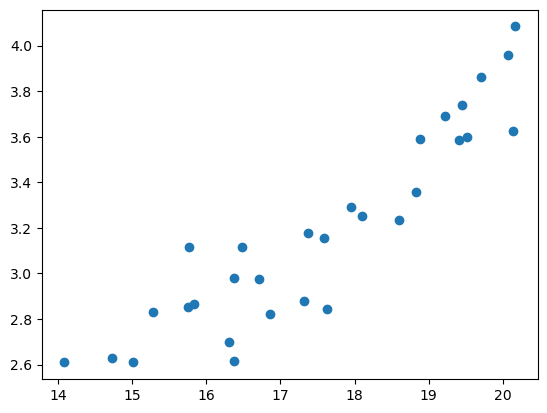

In [61]:
plt.scatter(air_dep_df["India Air Deposition of Nitrogen"], rice_yields_df["India Rice Yield"])

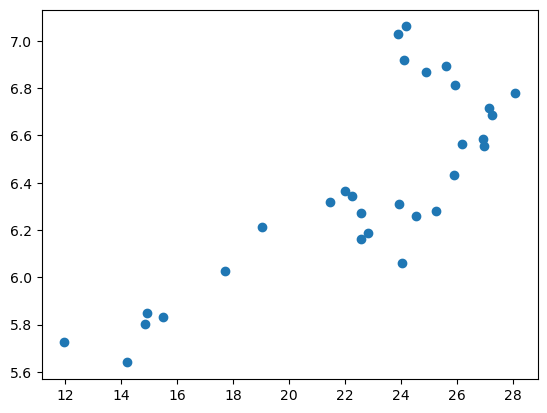

In [62]:
plt.scatter(air_dep_df["China Air Deposition of Nitrogen"], rice_yields_df["China Rice Yield"])

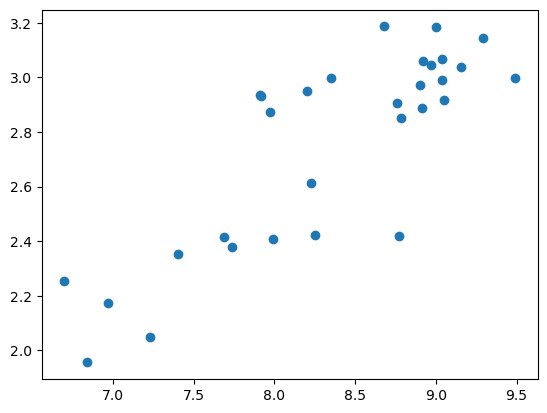

In [63]:
plt.scatter(air_dep_df["Thailand Air Deposition of Nitrogen"], rice_yields_df["Thailand Rice Yield"])

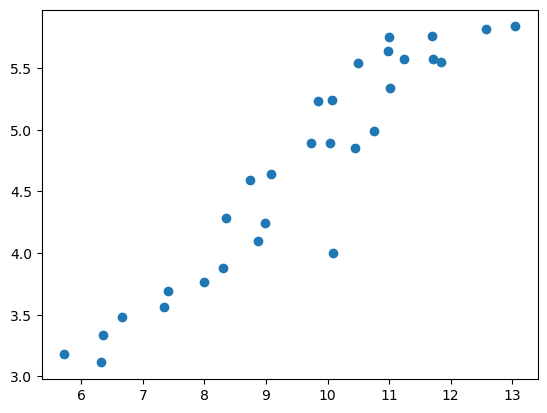

In [64]:
plt.scatter(air_dep_df["Vietnam Air Deposition of Nitrogen"], rice_yields_df["Vietnam Rice Yield"])